# Exercise - Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Perform the following operations:

1. Plot the voltage vs current. What degree of polynomial do you think is this?
2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.
### Perform KFold Cross validation with k=3 to 10 for degree 2, 3, 4. 


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

In [2]:
df = pd.read_excel('./data/data.xlsx')
print(df.head())

   voltage   current
0    -1.25 -3.164730
1    -1.20 -2.346773
2    -1.15 -1.305936
3    -1.10 -1.891162
4    -1.05 -1.040983


### 1. Plot the voltage vs current. What degree of polynomial do you think is this?

In [3]:
df.shape

(69, 2)

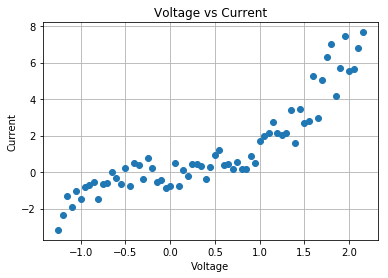

In [4]:
plt.plot(df['voltage'],df['current'],ls='None',marker='o')
plt.title('Voltage vs Current')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.grid()

##### I guess this is degree 2 polynomial

### 2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 

In [5]:
from sklearn.model_selection import train_test_split

X = [[each] for each in df['voltage']]
Y = [[each] for each in df['current']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=2)

poly = PolynomialFeatures(degree=2)
regressor_quadratic = LinearRegression()
X_quad_train = poly.fit_transform(X_train)
regressor_quadratic.fit(X_quad_train,Y_train)
X_quad_test = poly.transform(X_test)
obt_y_test = regressor_quadratic.predict(X_quad_test)

print("Polynomial Feature of Training:\n",X_quad_train,"\n\n")
print("Polynomial Feature of Testing:\n",X_quad_test,"\n\n")

Polynomial Feature of Training:
 [[ 1.0000e+00  1.5000e-01  2.2500e-02]
 [ 1.0000e+00 -6.0000e-01  3.6000e-01]
 [ 1.0000e+00  5.0000e-01  2.5000e-01]
 [ 1.0000e+00 -8.5000e-01  7.2250e-01]
 [ 1.0000e+00 -5.5000e-01  3.0250e-01]
 [ 1.0000e+00  1.9500e+00  3.8025e+00]
 [ 1.0000e+00 -4.0000e-01  1.6000e-01]
 [ 1.0000e+00  2.1000e+00  4.4100e+00]
 [ 1.0000e+00  1.5500e+00  2.4025e+00]
 [ 1.0000e+00  1.0500e+00  1.1025e+00]
 [ 1.0000e+00 -3.5000e-01  1.2250e-01]
 [ 1.0000e+00 -6.5000e-01  4.2250e-01]
 [ 1.0000e+00 -4.5000e-01  2.0250e-01]
 [ 1.0000e+00 -1.1500e+00  1.3225e+00]
 [ 1.0000e+00  1.4000e+00  1.9600e+00]
 [ 1.0000e+00 -3.0000e-01  9.0000e-02]
 [ 1.0000e+00  1.6000e+00  2.5600e+00]
 [ 1.0000e+00 -9.5000e-01  9.0250e-01]
 [ 1.0000e+00  1.8500e+00  3.4225e+00]
 [ 1.0000e+00 -5.0000e-02  2.5000e-03]
 [ 1.0000e+00 -1.0000e+00  1.0000e+00]
 [ 1.0000e+00  1.3000e+00  1.6900e+00]
 [ 1.0000e+00  4.0000e-01  1.6000e-01]
 [ 1.0000e+00  1.1500e+00  1.3225e+00]
 [ 1.0000e+00  1.2500e+00  1.56

### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?

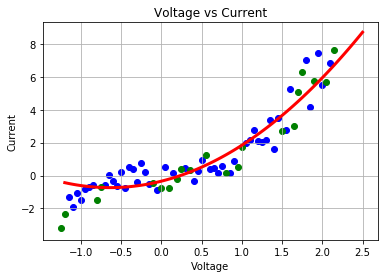

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=2)

poly = PolynomialFeatures(degree=2)
regressor_quadratic = LinearRegression()
X_quad_train = poly.fit_transform(X_train)
regressor_quadratic.fit(X_quad_train,Y_train)
X_quad_test = poly.transform(X_test)
obt_y_test = regressor_quadratic.predict(X_quad_test)

plt.scatter(X_train,Y_train,c="b") #Training set in blue
plt.scatter(X_test,Y_test,c="g") #Testing set in green
xx = np.linspace(-1.2,2.5,100)
xx_quadratic = poly.transform(xx.reshape(-1,1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',lw=3) #Polynomial curve
plt.grid()
plt.title('Voltage vs Current')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.show()

### Underfit in degree 2

### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score.

In [7]:
X_quad_test = poly.transform(X_test)
obt_y_test = regressor_quadratic.predict(X_quad_test)
print("Predicted Output for Testing set:\n",(obt_y_test),"\n\n")

Predicted Output for Testing set:
 [[ 4.73915853]
 [-0.4333073 ]
 [ 1.84203112]
 [ 1.2516443 ]
 [-0.05927072]
 [-0.45584016]
 [ 0.02360397]
 [-0.34282724]
 [ 5.44802805]
 [ 0.6215308 ]
 [-0.37714951]
 [ 1.68724308]
 [-0.72298736]
 [ 0.20373602]
 [ 4.51245714]
 [ 4.29054997]
 [ 3.65359381]
 [-0.21063742]
 [ 6.72536171]
 [ 6.20004557]
 [-0.70997758]] 




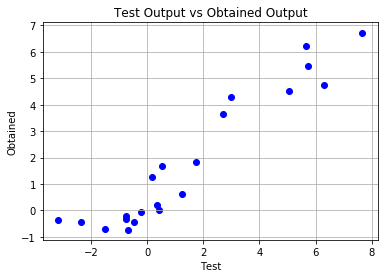

In [8]:
test_out = np.array(Y_test)
obt_out = regressor_quadratic.predict(X_quad_test)
plt.figure()
plt.grid()
plt.scatter(test_out,obt_out,c='b')
plt.title('Test Output vs Obtained Output')
plt.xlabel('Test')
plt.ylabel('Obtained')
plt.show()

In [18]:
mse = mean_squared_error(y_true=test_out,y_pred=obt_out)
print("MSE =",mse)
X = [[each] for each in df['voltage']]
Y = [[each] for each in df['current']]
scores = regressor_quadratic.score(poly.transform(X),Y)
print("Score =",scores)

MSE = 1.060101987818037
Score = 0.8909348518792197


### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.

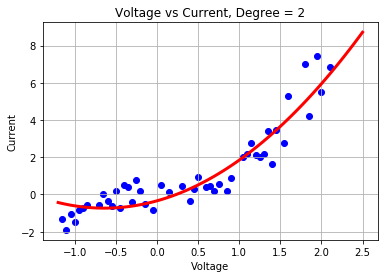

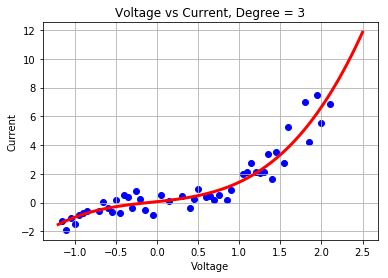

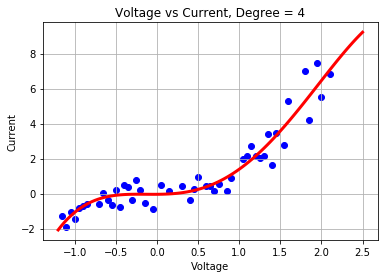

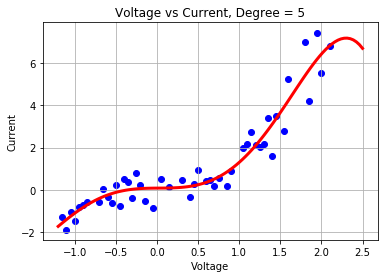

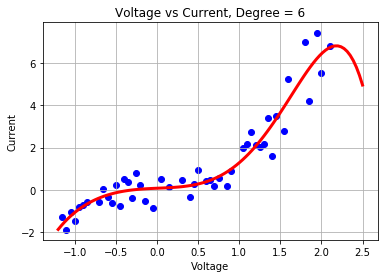

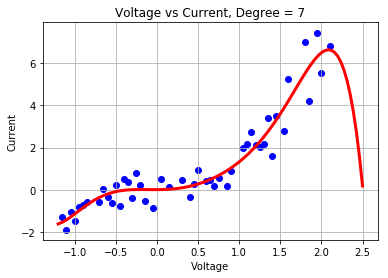

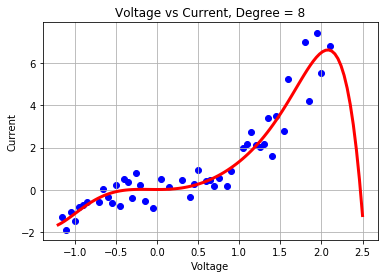

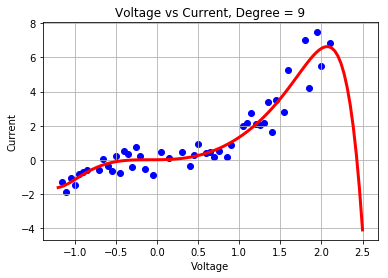

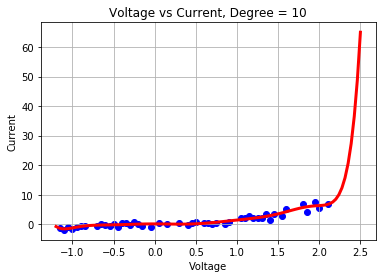

In [10]:
for i in range(2,11):
    poly = PolynomialFeatures(degree=i)
    regressor_quadratic = LinearRegression()
    X_quad_train = poly.fit_transform(X_train)
    regressor_quadratic.fit(X_quad_train,Y_train)
    X_quad_test = poly.transform(X_test)
    obt_y_test = regressor_quadratic.predict(X_quad_test)
    plt.scatter(X_train,Y_train,c="b") #Training set in blue
    xx = np.linspace(-1.2,2.5,100)
    xx_quadratic = poly.transform(xx.reshape(-1,1))
    plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',lw=3) #Polynomial curve
    plt.grid()
    plt.title('Voltage vs Current, Degree = {}'.format(i))
    plt.xlabel('Voltage')
    plt.ylabel('Current')
    plt.show()

##### It seems like from Degree = 4 the graph starts to overfit

### Perform KFold Cross validation with k=3 to 10 for degree 2, 3, 4. 

In [22]:
for i in [2,3,4]:
    poly = PolynomialFeatures(degree=i)
    regressor_quadratic = LinearRegression()
    X_quad_train = poly.fit_transform(X_train)
    regressor_quadratic.fit(X_quad_train,Y_train)
    X_quad_test = poly.transform(X_test)
    obt_y_test = regressor_quadratic.predict(X_quad_test)
    for j in range(3,11):
        scores = cross_val_score(regressor_quadratic,df['voltage'].values.reshape(-1,1),df['current'].values.reshape(-1,1),cv=j)
        print("Degree:{1} KFold:{0} Score:{2}\n".format(j,i,scores))

KFold:3 Degree:2 Score:[-9.41870793 -5.66445197 -1.46364038]

KFold:4 Degree:2 Score:[-4.91040609 -2.14896779 -2.57588358 -1.84050968]

KFold:5 Degree:2 Score:[ -2.84503879  -1.07173608 -10.14895306  -1.30122375  -3.39434577]

KFold:6 Degree:2 Score:[-1.99900205 -2.95720976 -2.19393446 -6.30970907 -0.18811868 -4.04467828]

KFold:7 Degree:2 Score:[-1.29873666 -4.82132666 -1.36511048 -6.9407082  -1.76478858  0.09393739
 -7.77985317]

KFold:8 Degree:2 Score:[ -1.1527281   -2.32360096  -0.62711008  -3.22198129 -25.49842508
  -1.55957858   0.24356333  -5.60129259]

KFold:9 Degree:2 Score:[-0.8040925  -4.11711708 -0.96370453 -1.48938701 -6.32281856 -3.33193361
 -1.25890148 -0.09966822 -3.63160723]

KFold:10 Degree:2 Score:[ -0.49753554  -6.05494241  -1.81665834  -1.80904813  -8.94060951
 -13.68650488  -1.35131749  -1.73547139  -0.37559996  -7.8068699 ]

KFold:3 Degree:3 Score:[-9.41870793 -5.66445197 -1.46364038]

KFold:4 Degree:3 Score:[-4.91040609 -2.14896779 -2.57588358 -1.84050968]

KFol